# merging orders

In [ ]:
import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define the directory containing Excel files
directory = '/content/drive/MyDrive/Capstone/Challenge24/datos/'

# Get list of files in directory
files = os.listdir(directory)
files

['tabla_ordenes_2.xlsx',
 'tabla_ordenes_3.xlsx',
 'tabla_ordenes_4.xlsx',
 'tabla_departamento.xlsx',
 'tabla_pasillos.xlsx',
 'tabla_ordenes_5.xlsx',
 'tabla_ordenes_1.xlsx',
 'tabla_producto.xlsx']

In [ ]:
# Filter only Excel files
files = [file for file in files if 'tabla_ordenes_' in file]

# Initialize an empty list to store dataframes
dfs = []

# Loop through filtered files, load each Excel file into a DataFrame, and append it to the list
for file in files:
    filepath = os.path.join(directory, file)
    df = pd.read_excel(filepath)
    dfs.append(df)

# Concatenate all DataFrames into one
orders = pd.concat(dfs, ignore_index=True)

In [ ]:
# Loading Department, Pasillos and Product datasets

department = pd.read_excel('/content/drive/MyDrive/Capstone/Challenge24/datos/tabla_departamento.xlsx')

pasillo = pd.read_excel('/content/drive/MyDrive/Capstone/Challenge24/datos/tabla_pasillos.xlsx')

products = pd.read_excel('/content/drive/MyDrive/Capstone/Challenge24/datos/tabla_producto.xlsx')

In [ ]:
#Merging orders with pasillo and department using the PRODUCTS dataset

merged_orders = orders.merge(products, how='left', on='id_producto'). \
                merge(department, how='left', on='id_departamento'). \
                merge(pasillo, how='left', on='id_pasillo')

In [ ]:
merged_orders.dropna(subset=['nombre_producto'], inplace=True)

# Loading merged dataset of orders

In [ ]:
"""dest_file = '/content/preprocessed/merged_orders.csv'

merged_orders = pd.read_csv(dest_file)"""

"dest_file = '/content/preprocessed/merged_orders.csv'\n\nmerged_orders = pd.read_csv(dest_file)"

In [ ]:
merged_orders.head()

,id_linea,id_orden,id_producto,incluido_orden_carrito,reordenado,nombre_producto,id_pasillo,id_departamento,departamento,pasillo
0,276923,674713,27845,2,1,ORGÁNICA LECHE ENTERA,84.0,16.0,HUEVOS Y LÁCTEOS,LECHES
1,276924,674713,1940,3,1,ORGÁNICA 2% REDUCCIÓN DE GRASA DE LECHE,84.0,16.0,HUEVOS Y LÁCTEOS,LECHES
2,276925,674720,19488,1,1,SELECT-A-BLANCO TAMAÑO TOALLAS DE PAPEL,54.0,17.0,FAMILIAR,ARTÍCULOS DE PAPEL
3,276926,674720,1560,2,0,BOLSA DE HIELO,37.0,1.0,CONGELADOS,HELADOS
4,276927,674720,35507,3,1,PURE LIFE AGUA PURIFICADA,115.0,7.0,BEBIDAS,SELTZER AGUA Y AGUA CON GAS


In [ ]:
# Step 2: Group by id_orden and pasillo, and count occurrences
passillo_counts = merged_orders.groupby(['id_orden', 'pasillo']).size().reset_index(name='count')

# Step 3: Pivot the table
passillo_pivot = passillo_counts.pivot(index='id_orden', columns='pasillo', values='count').fillna(0)
passillo_pivot

pasillo,ACCESORIOS PARA BEBÉS,ACEITES VINAGRES,ACEITUNAS ENCURTIDAS BIENES,ADEREZOS PARA ENSALADAS Y CONDIMENTOS,ALERGIAS GRIPE,ALIMENTOS DE LA INDIA,ALIMENTOS INSTANTÁNEOS,ALIMENTOS KOSHER,ALIMENTOS LATINOS,ALIVIO DEL DOLOR,...,SUPLEMENTOS DE VITAMINAS,SUSTITUTOS DE ALIMENTOS DE PROTEÍNAS,TÉ,UTENSILIOS DE COCINA,VEGETALES FRESCOS,VEGETARIANA VEGANA CONGELADA,VERDURAS EN CONSERVA Y EN FRASCOS,VINOS BLANCOS,VINOS TINTOS,YOGUR
id_orden,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
38,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
98,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3421056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3421058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
passillo_pivot_sample = passillo_pivot.sample(frac=0.1)
passillo_pivot_sample.reset_index(inplace=True)
passillo_pivot_sample.drop(columns=['id_orden'], inplace=True)

## to reproduce the results we got let's load the sample which was used in our analysis

Please upload related files to sessions storage

In [ ]:
dest_file = '/content/drive/MyDrive/Capstone/Challenge24/passillo_sample_clustered.csv'

passillo_pivot_sample = pd.read_csv(dest_file)
passillo_pivot_sample.drop(columns = ["Unnamed: 0"], inplace = True)

## proceeding

In [ ]:
pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 29.4 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.10
    Uninstalling Cython-3.0.10:
      Successfully uninstalled Cython-3.0.10


In [ ]:
from sklearn.manifold import TSNE

projection = TSNE().fit_transform(passillo_pivot_sample)

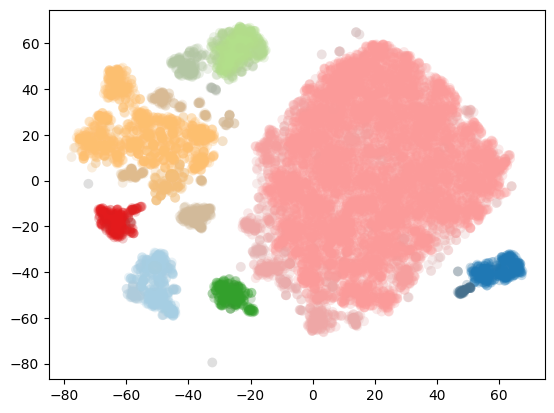

In [ ]:
import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=250, min_samples = 2, allow_single_cluster=False,
                            cluster_selection_epsilon = 0.2, cluster_selection_method = 'eom').fit(projection)
# Define color palette based on the number of unique clusters found
color_palette = sns.color_palette('Paired', len(set(clusterer.labels_)))

# Assign colors to clusters
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]

# Adjust colors based on probabilities
cluster_member_colors = [sns.desaturate(x, p) for x, p in zip(cluster_colors, clusterer.probabilities_)]

# Plot the scatter plot
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)
plt.show()

In [ ]:
len(np.unique(clusterer.labels_))

8

In [ ]:
# Print clustering results
print("Cluster labels:", clusterer.labels_)
print("Probabilities:", clusterer.probabilities_)

Cluster labels: [4 4 6 ... 4 4 6]
Probabilities: [1. 1. 1. ... 1. 1. 1.]


In [ ]:
# Assign cluster labels to passillo_pivot_sample
passillo_pivot_sample['cluster_label'] = clusterer.labels_

# Assigning clusters to whole dataset based on cosine similarity


In [ ]:
# Extract the transactions used in passillo_pivot_sample and their cluster labels
passillo_pivot_sample['id_orden'] = passillo_pivot_sample.index

# Create a mapping of id_orden to cluster_label
cluster_mapping = passillo_pivot_sample[['id_orden', 'cluster_label']]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def find_similar_transactions_chunked(passillo_pivot, passillo_pivot_sample, chunk_size=10000, threshold=0.8):
    passillo_pivot_sample_aligned = passillo_pivot_sample.drop(columns=['cluster_label']).copy()
    passillo_pivot_sample_aligned = passillo_pivot_sample_aligned[passillo_pivot.columns]

    # Initialize a DataFrame to store results
    similar_transactions_list = []

    num_chunks = int(np.ceil(passillo_pivot.shape[0] / chunk_size))

    for i in range(num_chunks):
        print(f"Processing chunk {i+1}/{num_chunks}")
        start_idx = i * chunk_size
        end_idx = min((i + 1) * chunk_size, passillo_pivot.shape[0])

        # Take a chunk of passillo_pivot
        passillo_pivot_chunk = passillo_pivot.iloc[start_idx:end_idx]

        # Compute the cosine similarity between the chunk and the sample
        similarity_matrix = cosine_similarity(passillo_pivot_chunk, passillo_pivot_sample_aligned)

        # Assign clusters to similar transactions based on the threshold
        for j in range(similarity_matrix.shape[0]):
            max_sim_index = np.argmax(similarity_matrix[j])
            max_sim_value = similarity_matrix[j, max_sim_index]

            if max_sim_value >= threshold:
                similar_transactions_list.append({
                    'id_orden': passillo_pivot_chunk.index[j],
                    'cluster_label': passillo_pivot_sample.iloc[max_sim_index]['cluster_label']
                })

    similar_transactions_df = pd.DataFrame(similar_transactions_list)
    return similar_transactions_df

# Apply the chunked similarity search
similar_transactions_df = find_similar_transactions_chunked(passillo_pivot, passillo_pivot_sample)

# Merge the cluster labels with the original merged_orders
merged_orders_with_clusters = merged_orders.merge(similar_transactions_df, on='id_orden', how='left')

Processing chunk 1/14
Processing chunk 2/14
Processing chunk 3/14
Processing chunk 4/14
Processing chunk 5/14
Processing chunk 6/14
Processing chunk 7/14
Processing chunk 8/14
Processing chunk 9/14
Processing chunk 10/14
Processing chunk 11/14
Processing chunk 12/14
Processing chunk 13/14
Processing chunk 14/14


<ipython-input-21-97a52dd605e0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


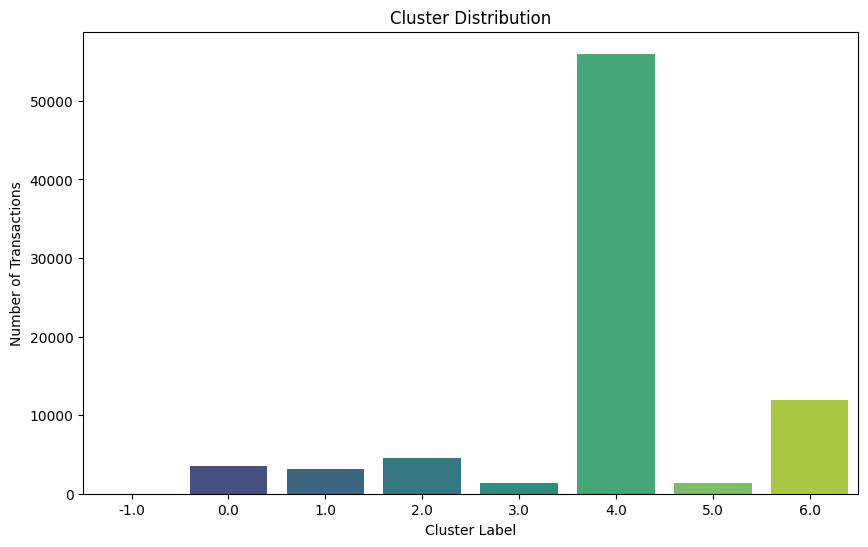

In [ ]:
# Count the number of transactions in each cluster
cluster_counts = similar_transactions_df['cluster_label'].value_counts().sort_index()

# Plot the cluster distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Transactions')
plt.title('Cluster Distribution')
plt.show()

In [ ]:
# Merge passillo_pivot with cluster labels
passillo_pivot = passillo_pivot.reset_index()
similar_transactions_df = similar_transactions_df.reset_index()

# Ensure the 'id_orden' column exists in both dataframes
if 'id_orden' not in passillo_pivot.columns:
    passillo_pivot['id_orden'] = passillo_pivot.index

# Merge the cluster labels back to passillo_pivot
passillo_pivot = passillo_pivot.merge(similar_transactions_df[['id_orden', 'cluster_label']], on='id_orden', how='left')

# Drop rows where cluster_label is NaN (these were not in the sampled dataset)
passillo_pivot = passillo_pivot.dropna(subset=['cluster_label'])

# Convert cluster_label to int
passillo_pivot['cluster_label'] = passillo_pivot['cluster_label'].astype(int)

<ipython-input-22-96dccbde1c37>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passillo_pivot['cluster_label'] = passillo_pivot['cluster_label'].astype(int)


In [ ]:
# Print top 5 passillos of each cluster
for cluster_label in sorted(passillo_pivot['cluster_label'].unique()):
    cluster_data = passillo_pivot[passillo_pivot['cluster_label'] == cluster_label]
    print(f"Cluster {cluster_label}:")
    top_passillos = cluster_data.drop(columns=['cluster_label', 'id_orden']).mean().sort_values(ascending=False).head(5)
    print(top_passillos)
    print()

Cluster -1:
CEREAL                              0.5
CARNE DE ALMUERZO                   0.5
LOCIONES DE JABÓN PARA EL CUERPO    0.5
COMIDA PARA PERROS                  0.5
HIGIENE ORAL                        0.5
dtype: float64

Cluster 0:
SELTZER AGUA Y AGUA CON GAS    0.929129
ARTÍCULOS DE PAPEL             0.427734
PRODUCTOS DE LIMPIEZA          0.297991
LAVANDERÍA                     0.184152
LECHES                         0.070033
dtype: float64

Cluster 1:
PRODUCTOS ENVASADOS                  1.896217
FRUTAS FRESCAS                       1.065309
ENVASADOS ​​DE FRUTAS Y VEGETALES    0.413838
VEGETALES FRESCOS                    0.294536
COMIDA PARA GATOS                    0.256709
dtype: float64

Cluster 2:
YOGUR                                2.672128
BARRAS DE GRANOLA DE ENERGÍA         0.818685
FRUTAS FRESCAS                       0.749834
VEGETALES FRESCOS                    0.518486
ENVASADOS ​​DE FRUTAS Y VEGETALES    0.397830
dtype: float64

Cluster 3:
HELADOS             

## Saving clustered data separately

In [ ]:
# Create a dictionary to hold separate DataFrames for each cluster
cluster_datasets = {}

# Group the passillo_pivot DataFrame by the 'cluster_label' column
grouped = passillo_pivot.groupby('cluster_label')

# Iterate over each group (cluster)
for cluster_label, group_df in grouped:
    # Store the group DataFrame in the dictionary with the cluster label as the key
    cluster_datasets[cluster_label] = group_df.copy()

In [ ]:
import os

# Create a directory to store the CSV files if it doesn't exist
output_directory = 'cluster_datasets'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Save each DataFrame in the cluster_datasets dictionary as a separate CSV file
for cluster_label, df in cluster_datasets.items():
    filename = os.path.join(output_directory, f'cluster_{cluster_label}.csv')
    df.to_csv(filename, index=False)
    print(f"Saved DataFrame for Cluster {cluster_label} to: {filename}")

Saved DataFrame for Cluster -1 to: cluster_datasets/cluster_-1.csv
Saved DataFrame for Cluster 0 to: cluster_datasets/cluster_0.csv
Saved DataFrame for Cluster 1 to: cluster_datasets/cluster_1.csv
Saved DataFrame for Cluster 2 to: cluster_datasets/cluster_2.csv
Saved DataFrame for Cluster 3 to: cluster_datasets/cluster_3.csv
Saved DataFrame for Cluster 4 to: cluster_datasets/cluster_4.csv
Saved DataFrame for Cluster 5 to: cluster_datasets/cluster_5.csv
Saved DataFrame for Cluster 6 to: cluster_datasets/cluster_6.csv


# Loop over all cluster datasets

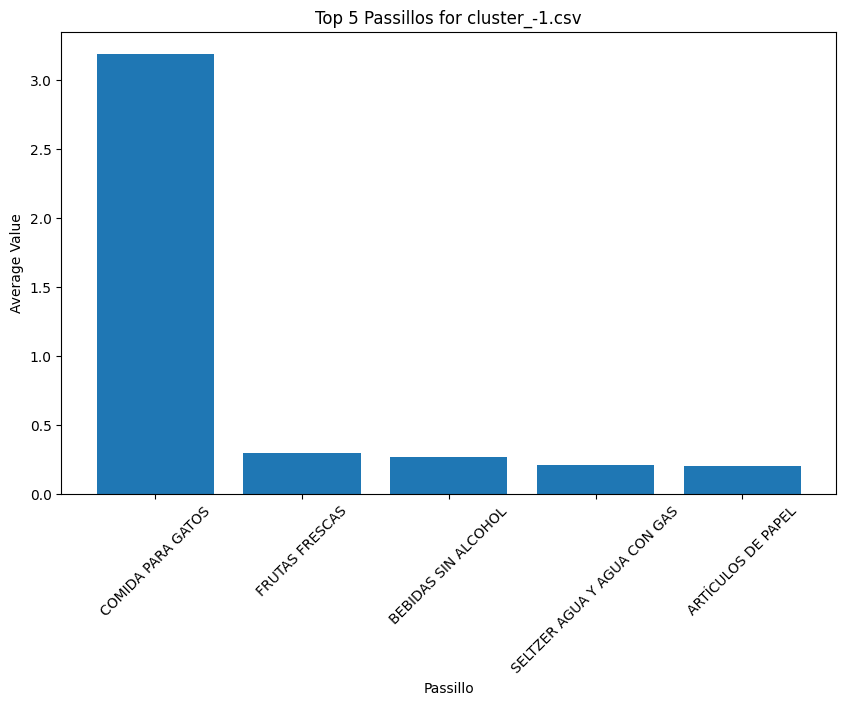

Number of unique ids in cluster_-1.csv: 249


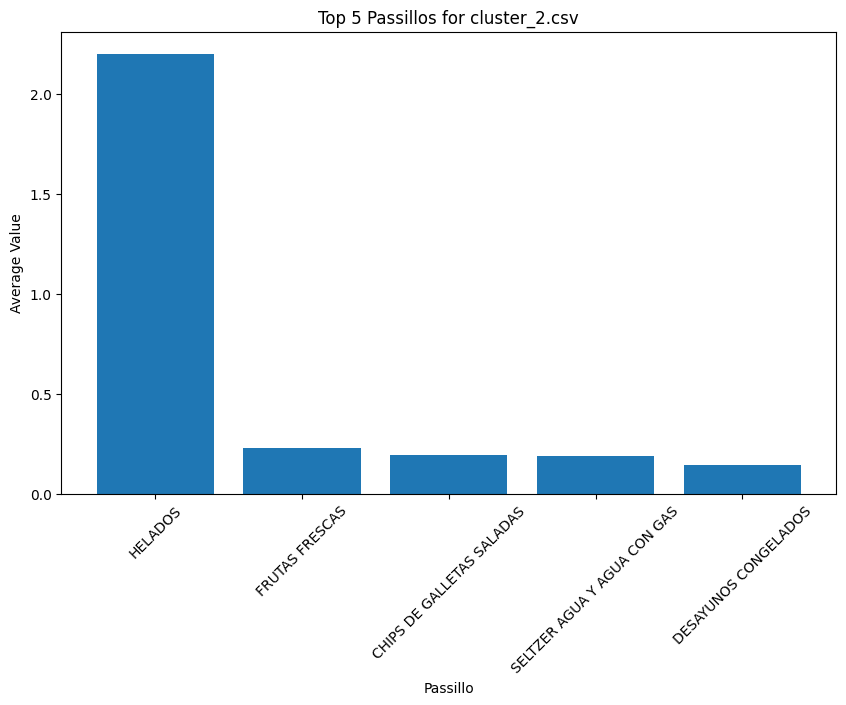

Number of unique ids in cluster_2.csv: 1413


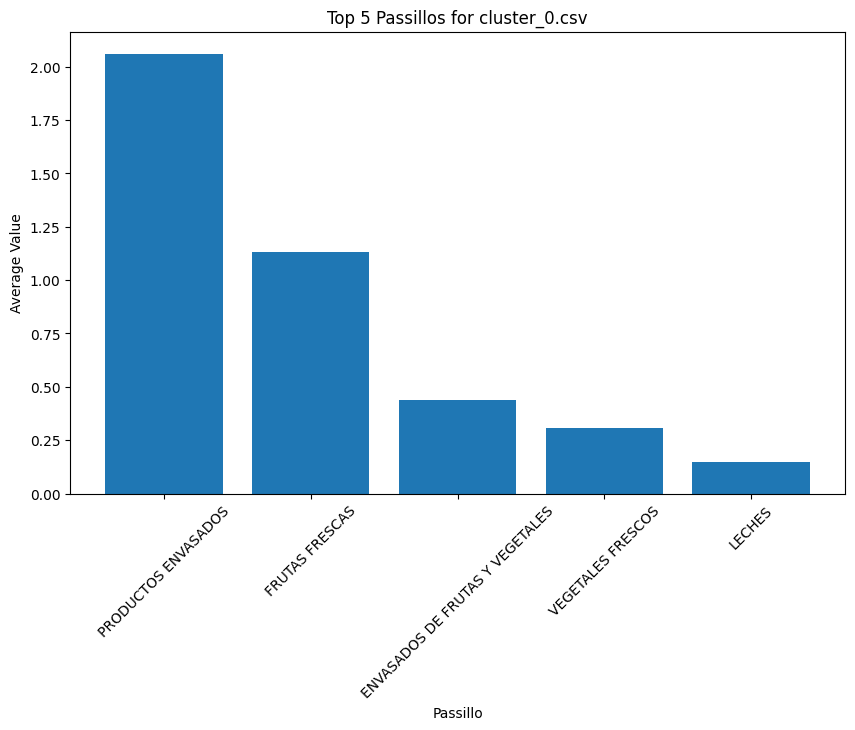

Number of unique ids in cluster_0.csv: 2844


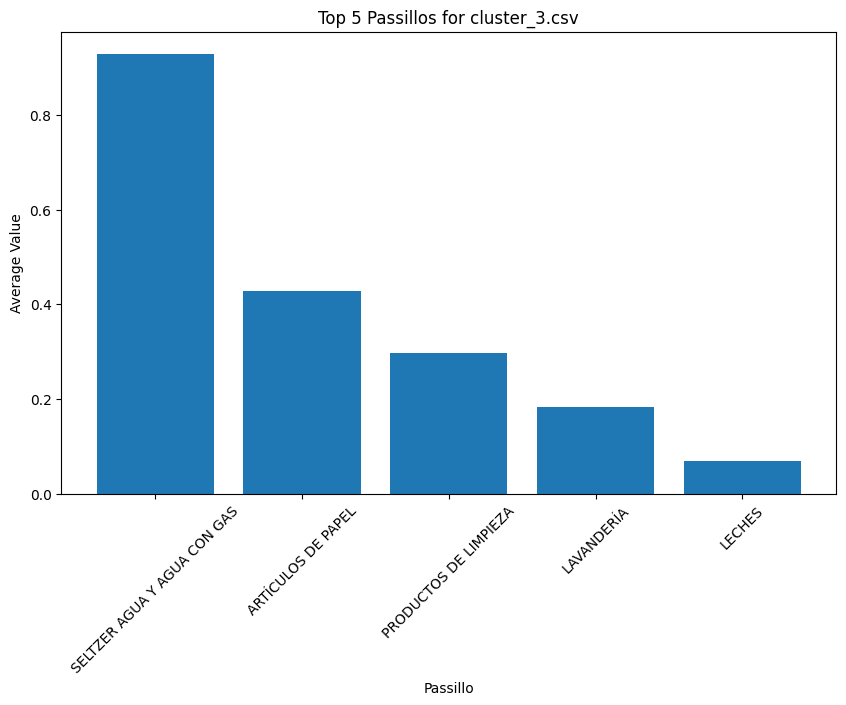

Number of unique ids in cluster_3.csv: 3585


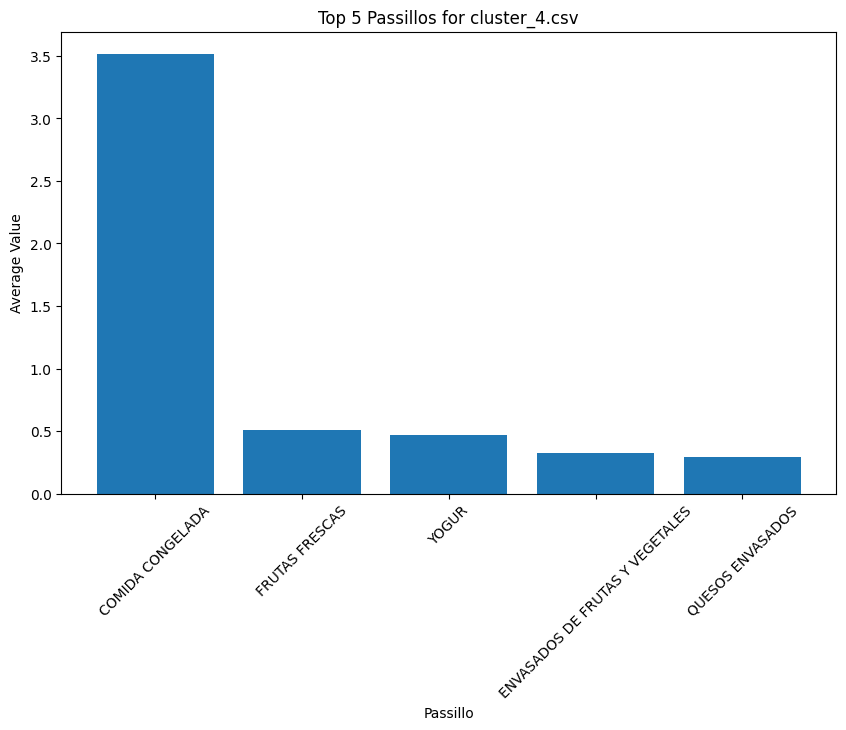

Number of unique ids in cluster_4.csv: 1298


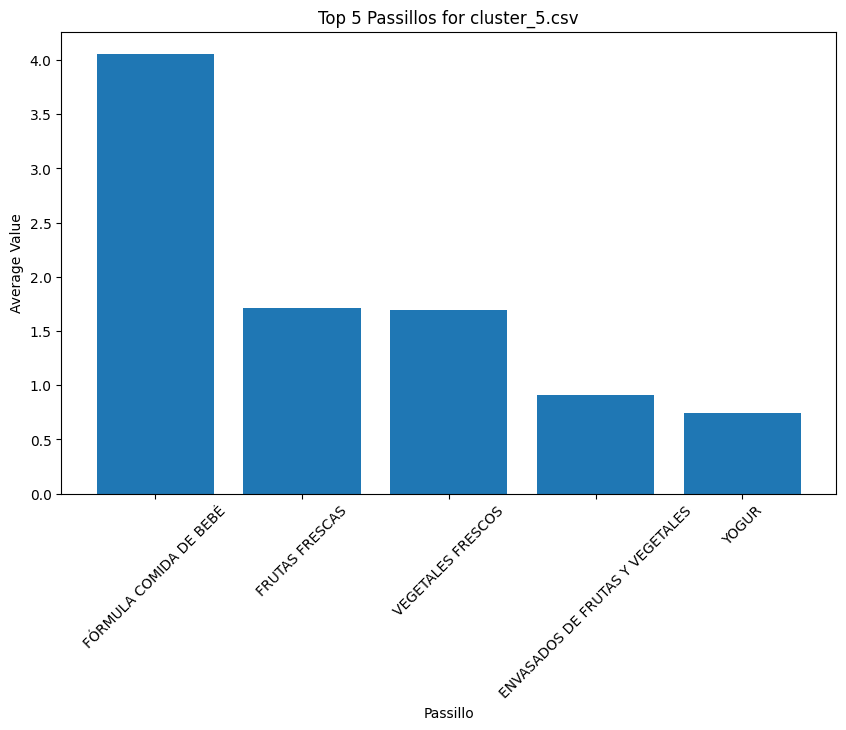

Number of unique ids in cluster_5.csv: 1869


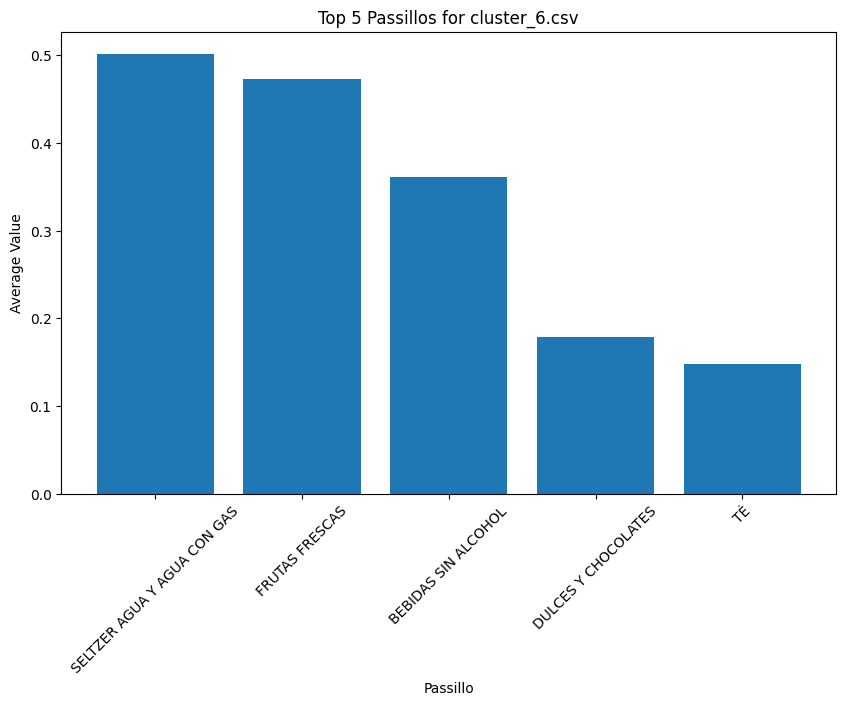

Number of unique ids in cluster_6.csv: 10347


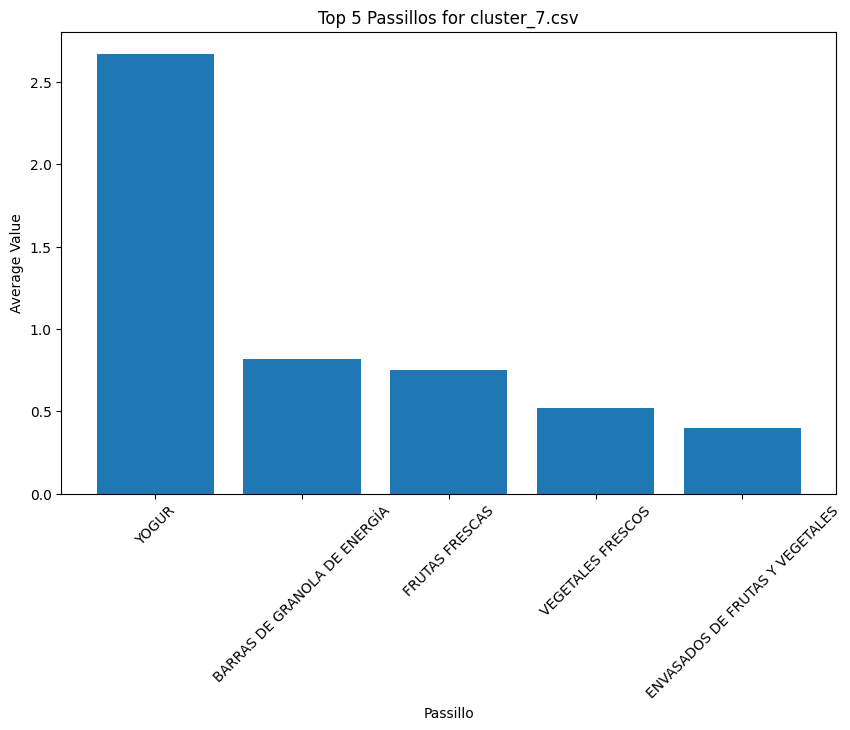

Number of unique ids in cluster_7.csv: 4522


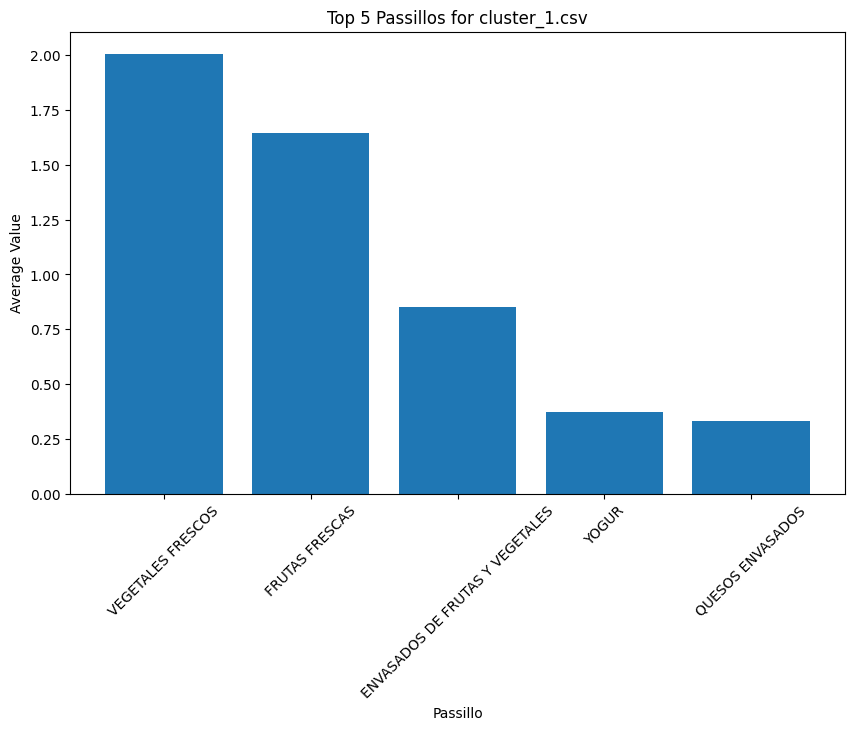

Number of unique ids in cluster_1.csv: 55895


In [ ]:
import glob

# Get a list of all cluster files in the folder
cluster_files = glob.glob('/content/drive/MyDrive/Capstone/Challenge24/clusters/cluster_*.csv')

for file in cluster_files:
    # Read the cluster file
    cluster = pd.read_csv(file)

    # Drop the 'cluster_label' column as we have only one cluster in each file
    cluster_data = cluster.drop(columns=['id_orden', 'cluster_label'])

    # Calculate the top 5 passillos
    top_passillos = cluster_data.mean().sort_values(ascending=False).head(5)

    # Calculate the sum for each passillo
    passillo_sums = cluster_data.sum()

    # Calculate the total sum of all passillos
    total_sum = passillo_sums.sum()

    # Calculate the percentage of total items sold for each passillo
    passillo_percentages = (passillo_sums / total_sum) * 100

    # Get the top 5 passillos by percentage
    top_passillos_percent = passillo_percentages.sort_values(ascending=False).head(5)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(top_passillos.index, top_passillos.values)
    plt.xlabel('Passillo')
    plt.ylabel('Average Value')
    plt.title(f'Top 5 Passillos for {file.split("/")[-1]}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

    # Get the unique 'id_orden' values
    cluster_ids = cluster['id_orden'].unique()
    print(f'Number of unique ids in {file.split("/")[-1]}: {cluster_ids.shape[0]}')

In [ ]:
cluster.head()

,id_orden,ACCESORIOS PARA BEBÉS,ACEITES VINAGRES,ACEITUNAS ENCURTIDAS BIENES,ADEREZOS PARA ENSALADAS Y CONDIMENTOS,ALERGIAS GRIPE,ALIMENTOS DE LA INDIA,ALIMENTOS INSTANTÁNEOS,ALIMENTOS KOSHER,ALIMENTOS LATINOS,...,SUSTITUTOS DE ALIMENTOS DE PROTEÍNAS,TÉ,UTENSILIOS DE COCINA,VEGETALES FRESCOS,VEGETARIANA VEGANA CONGELADA,VERDURAS EN CONSERVA Y EN FRASCOS,VINOS BLANCOS,VINOS TINTOS,YOGUR,cluster_label
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1
1,36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1
2,38,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
3,96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
4,112,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


# Let's see an example on one cluster

In [ ]:
dest_file = '/content/drive/MyDrive/Capstone/Challenge24/clusters/cluster_7.csv'

cluster = pd.read_csv(dest_file)
#cluster_1.drop(columns = ["Unnamed: 0"], inplace = True)

In [ ]:
import matplotlib.pyplot as plt

# Drop the 'cluster_label' column as we have only one cluster
cluster_data = cluster.drop(columns=['id_orden', 'cluster_label'])

# Calculate the top 5 passillos
top_passillos = cluster_data.mean().sort_values(ascending=False).head(5)

In [ ]:
# Calculate the sum for each passillo
passillo_sums = cluster_data.sum()

# Calculate the total sum of all passillos
total_sum = passillo_sums.sum()

# Calculate the percentage of total items sold for each passillo
passillo_percentages = (passillo_sums / total_sum) * 100

# Get the top 5 passillos by percentage
top_passillos_percent = passillo_percentages.sort_values(ascending=False).head(5)

In [ ]:
top_passillos_percent

YOGUR                                25.115361
BARRAS DE GRANOLA DE ENERGÍA          7.688630
FRUTAS FRESCAS                        7.065059
VEGETALES FRESCOS                     4.882561
ENVASADOS ​​DE FRUTAS Y VEGETALES     3.749740
dtype: float64

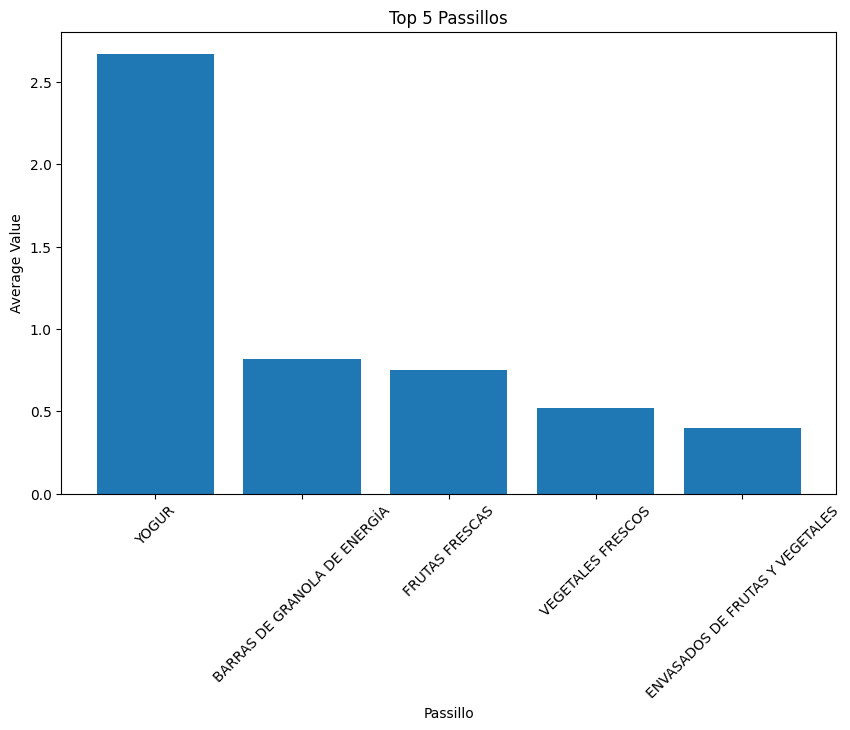

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_passillos.index, top_passillos.values)
plt.xlabel('Passillo')
plt.ylabel('Average Value')
plt.title('Top 5 Passillos')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
cluster_ids = cluster['id_orden'].unique()

In [ ]:
cluster_ids.shape

(4522,)

In [ ]:
cluster_orders = merged_orders[merged_orders['id_orden'].isin(cluster_ids)][['id_orden', 'id_producto']]

In [ ]:
cluster_orders

,id_orden,id_producto
38,674839,49628
39,674839,40198
40,674839,46886
41,674839,36189
42,674839,11520
...,...,...
1383861,672694,4835
1383862,672694,15064
1383863,672694,25346
1384318,673982,38928


# Initializing the graph

In [ ]:
import networkx as nx
from collections import defaultdict
import itertools
# Initialize the graph
G = nx.Graph()

# Group the orders by 'id_orden' to get all products within each transaction
grouped_orders = cluster_orders.groupby('id_orden')['id_producto'].apply(list)

# Use a dictionary to count co-occurrences
edge_count = defaultdict(int)

# Iterate through each transaction
for products in grouped_orders:
    # Create all possible pairs of products within the transaction
    for pair in itertools.combinations(products, 2):
        sorted_pair = tuple(sorted(pair))
        edge_count[sorted_pair] += 1

# Add edges and weights to the graph
for (source, target), weight in edge_count.items():
    if G.has_edge(source, target):
        G[source][target]['weight'] += weight
    else:
        G.add_edge(source, target, weight=weight)


In [ ]:
edge_list = nx.to_pandas_edgelist(G)
edge_list.head()

,source,target,weight
0,4957,33754,99
1,4957,40571,87
2,4957,43369,5
3,4957,18523,54
4,4957,33682,13


In [ ]:
"""edge_list_output_path = '/content/drive/MyDrive/Capstone/Challenge24/clusters/edges_cluster_1.csv'
edge_list.to_csv(edge_list_output_path, index=False)"""

## what are the products in there?

In [ ]:
# Extract unique product IDs from source and target columns
unique_product_ids = pd.unique(edge_list[['source', 'target']].values.ravel('K'))

# Create a DataFrame with these unique product IDs
unique_products_df = pd.DataFrame({'id_producto': unique_product_ids})

# Merge with merged_orders to get product names
product_names_df = unique_products_df.merge(merged_orders[['id_producto', 'nombre_producto']].drop_duplicates(), on='id_producto', how='left')

In [ ]:
product_names_df.head()

,id_producto,nombre_producto
0,4957,TOTAL 2% BAJA EN GRASA GRIEGA SOBRECARGA EN YO...
1,33754,TOTAL 2% CON FRESA BAJO EN GRASA YOGUR GRIEGO ...
2,35221,CAL AGUA CON GAS
3,39322,CARAMELO ALMENDRA Y SAL DEL MAR TUERCA DE BARRA
4,3634,PATATAS FRITAS DE CORTE CLÁSICO KRINKLE BARBACOA


In [ ]:
"""# Save the nodes DataFrame to a CSV
nodes_output_path = '/content/drive/MyDrive/Capstone/Challenge24/clusters/nodes_cluster_1.csv'
product_names_df.to_csv(nodes_output_path, index=False)"""

"# Save the nodes DataFrame to a CSV\nnodes_output_path = '/content/drive/MyDrive/Capstone/Challenge24/clusters/nodes_cluster_1.csv'\nproduct_names_df.to_csv(nodes_output_path, index=False)"

## what  can we say about the graph

In [ ]:
# Print the size of the graph
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print(f"The graph has {num_nodes} nodes and {num_edges} edges.")

The graph has 10121 nodes and 311254 edges.


In [ ]:
# Calculate network metrics
components = [G.subgraph(c).copy() for c in nx.connected_components(G)]

In [ ]:
diameters = [nx.diameter(comp) for comp in components]
diameter = max(diameters)
print("Diameter of the Network:", diameter)

Diameter of the Network: 6


In [ ]:
average_path_lengths = [nx.average_shortest_path_length(comp) for comp in components]
average_path_length = sum(average_path_lengths) / len(average_path_lengths)
print("Average Path Length of the Network:", average_path_length)

Average Path Length of the Network: 1.3150775939165906


In [ ]:
largest_component = max(components, key=len)

In [ ]:
# Calculate the average number of items in the basket
average_items_in_basket = sum(len(list(G.neighbors(node))) for node in G.nodes) / G.number_of_nodes()

# Print network metrics
print("Average Items in the Basket:", average_items_in_basket)

Average Items in the Basket: 61.50657049698646


In [ ]:
product_names_dict = product_names_df.set_index('id_producto')['nombre_producto'].to_dict()

## digging deep into the network analysis

In [ ]:
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
pagerank_centrality = nx.pagerank(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Create a DataFrame to store the centrality measures
centrality_df = pd.DataFrame({
    'id_producto': list(degree_centrality.keys()),
    'degree_centrality': list(degree_centrality.values()),
    'betweenness_centrality': list(betweenness_centrality.values()),
    'closeness_centrality': list(closeness_centrality.values()),
    'pagerank_centrality': list(pagerank_centrality.values()),
    'eigenvector_centrality': list(eigenvector_centrality.values())
})

In [ ]:
centrality_with_names = centrality_df.merge(product_names_df, on='id_producto', how='left')

In [ ]:
# Sort by degree centrality and print the top products
top_degree_centrality = centrality_with_names.sort_values(by='degree_centrality', ascending=False).head(10)
print("Top Products by Degree Centrality:")
print(top_degree_centrality[['nombre_producto', 'degree_centrality']])
print()

# Sort by betweenness centrality and print the top products
top_betweenness_centrality = centrality_with_names.sort_values(by='betweenness_centrality', ascending=False).head(10)
print("Top Products by Betweenness Centrality:")
print(top_betweenness_centrality[['nombre_producto', 'betweenness_centrality']])
print()

# Sort by closeness centrality and print the top products
top_closeness_centrality = centrality_with_names.sort_values(by='closeness_centrality', ascending=False).head(10)
print("Top Products by Closeness Centrality:")
print(top_closeness_centrality[['nombre_producto', 'closeness_centrality']])
print()

# Sort by pagerank centrality and print the top products
top_pagerank_centrality = centrality_with_names.sort_values(by='pagerank_centrality', ascending=False).head(10)
print("Top Products by PageRank Centrality:")
print(top_pagerank_centrality[['nombre_producto', 'pagerank_centrality']])
print()

# Sort by eigenvector centrality and print the top products
top_eigenvector_centrality = centrality_with_names.sort_values(by='eigenvector_centrality', ascending=False).head(10)
print("Top Products by Eigenvector Centrality:")
print(top_eigenvector_centrality[['nombre_producto', 'eigenvector_centrality']])
print()

Top Products by Degree Centrality:
                                       nombre_producto  degree_centrality
56                                              BANANA           0.385375
37                            BOLSA DE BANANO ORGÁNICO           0.253360
225                                   FRESAS ORGÁNICAS           0.185474
1    TOTAL 2% CON FRESA BAJO EN GRASA YOGUR GRIEGO ...           0.174012
393  TOTAL 2% BAJA EN GRASA GRIEGA ES SOBRECARGA YO...           0.153458
0    TOTAL 2% BAJA EN GRASA GRIEGA SOBRECARGA EN YO...           0.151087
147  TOTAL 2% SOBRECARGA EN GRIEGO DEL YOGUR CON CE...           0.150988
51                                              FRESAS           0.146245
92                            LAS FRAMBUESAS ORGÁNICAS           0.146047
118   ISLANDIA ESTILO DE SKYR ARÁNDANO YOGUR SIN GRASA           0.144368

Top Products by Betweenness Centrality:
                                       nombre_producto  betweenness_centrality
56                             